<a href="https://colab.research.google.com/github/Seenuprime/Deep-Learning/blob/main/Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Boston (1).csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# df.sort_values(by=['MEDV'], ascending=True, inplace=True)
# df.head()

### Dividing the Dataset into Training set and Test set

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Scaling the Dataset

In [7]:
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
# ct = make_column_transformer(
#     (MinMaxScaler(), slice(0, 13))
# )

In [8]:
# X_train = ct.fit_transform(X_train)
# X_test = ct.transform(X_test)

## Building a Model

In [9]:
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 40.8101 - mae: 40.8101
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 16.7462 - mae: 16.7462
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 11.9042 - mae: 11.9042
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 9.7207 - mae: 9.7207
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 8.2827 - mae: 8.2827
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 7.3877 - mae: 7.3877
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 6.9456 - mae: 6.9456
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 6.5536 - mae: 6.5536
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 6.3878 - mae: 6.3878
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 6.3678 - mae: 6.3678
Epoch 11/100
13/13 [==============================] -

## Evaluating the Model

In [10]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 5.5540 - mae: 5.5540


[5.553956508636475, 5.553956508636475]

In [11]:
predicted = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [12]:
stacked = np.column_stack((y_test, tf.squeeze(predicted)))
print(stacked[:4])

[[22.6        17.26323509]
 [50.         18.96059227]
 [23.         21.27631569]
 [ 8.3        13.60651207]]


Text(0.5, 0, 'epochs')

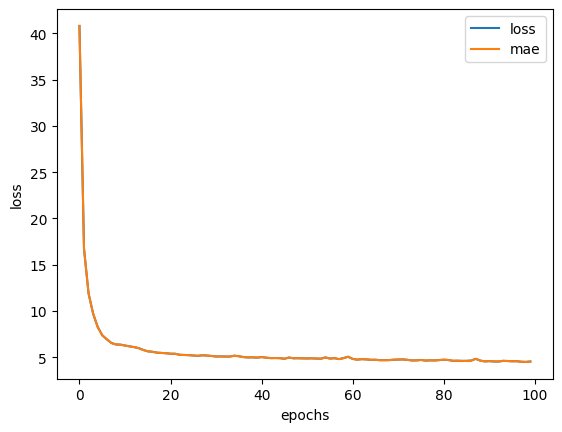

In [13]:
## Ploting the Learning curve

pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')